In [12]:
import requests
import csv
from datetime import datetime
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib

In [13]:
url_page = 'http://www.bolsamadrid.es/esp/aspx/Indices/Resumen.aspx'

page = requests.get(url_page).text
soup = BeautifulSoup(page, "lxml")

table = soup.find("table", {'id': 'ctl00_Contenido_tblÍndices'})
name = ""
porcent = ""
nroFila = 0

In [14]:
for fila in table.find_all("tr"):
    #for row in  tabla.find_all("td")::
    nroCelda=0
    for celda in fila.find_all('td'):
        if nroCelda==0:
            name=celda.text
            print("Nombre:", name)
        if nroCelda==3:
            porcent=celda.text
            print("Porcentaje de Dif:", porcent)
        nroCelda+=1
    nroFila+=1

Nombre: IBEX 35®
Porcentaje de Dif: 0,14
Nombre: IBEX 35® con Dividendos
Porcentaje de Dif: 0,14
Nombre: IBEX MEDIUM CAP®
Porcentaje de Dif: 0,13
Nombre: IBEX SMALL CAP®
Porcentaje de Dif: 0,45
Nombre: IBEX 35® Bancos
Porcentaje de Dif: 0,93
Nombre: IBEX 35® Energía
Porcentaje de Dif: -0,43
Nombre: IBEX 35® Construcción
Porcentaje de Dif: 0,23
Nombre: IBEX TOP Dividendo®
Porcentaje de Dif: 0,47
Nombre: IBEX 35® con Dividendos Netos
Porcentaje de Dif: 0,14
Nombre: IBEX 35® Inverso
Porcentaje de Dif: -0,14
Nombre: IBEX 35® Doble Inverso
Porcentaje de Dif: -0,29
Nombre: IBEX 35® Inverso X3
Porcentaje de Dif: -0,41
Nombre: IBEX 35® Inverso X5
Porcentaje de Dif: -0,69
Nombre: IBEX 35® Inverso X10
Porcentaje de Dif: -1,38
Nombre: IBEX 35® Doble Apalancado
Porcentaje de Dif: 0,28
Nombre: IBEX 35® Doble Apalancado Bruto
Porcentaje de Dif: 0,27
Nombre: IBEX 35® Doble Apalancado Neto
Porcentaje de Dif: 0,28
Nombre: IBEX 35® Apalancado X3
Porcentaje de Dif: 0,41
Nombre: IBEX 35® Apalancado Neto X

In [15]:
with open('bolsa_ibex35.csv', 'a', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow([name, porcent])
csv_file.close()

In [16]:
df = pd.read_csv('bolsa_ibex35.csv')

headerList= ["Name" , "Porcentaje"]

df.to_csv('bolsa_ibex35.csv',header=headerList, index=False)
df

,Name,Porcentaje
0,IBEX 35®,"0,14"
1,IBEX 35® con Dividendos,"0,14"
2,IBEX MEDIUM CAP®,"0,13"
3,IBEX SMALL CAP®,"0,45"
4,IBEX 35® Bancos,"0,93"
...,...,...
74,Índice TEF Inverso X5,"-7,32"
75,Índice SAN Inverso X5,"-4,18"
76,Índice BBVA Inverso X5,"-2,69"
77,Índice ITX Inverso X5,"-0,08"


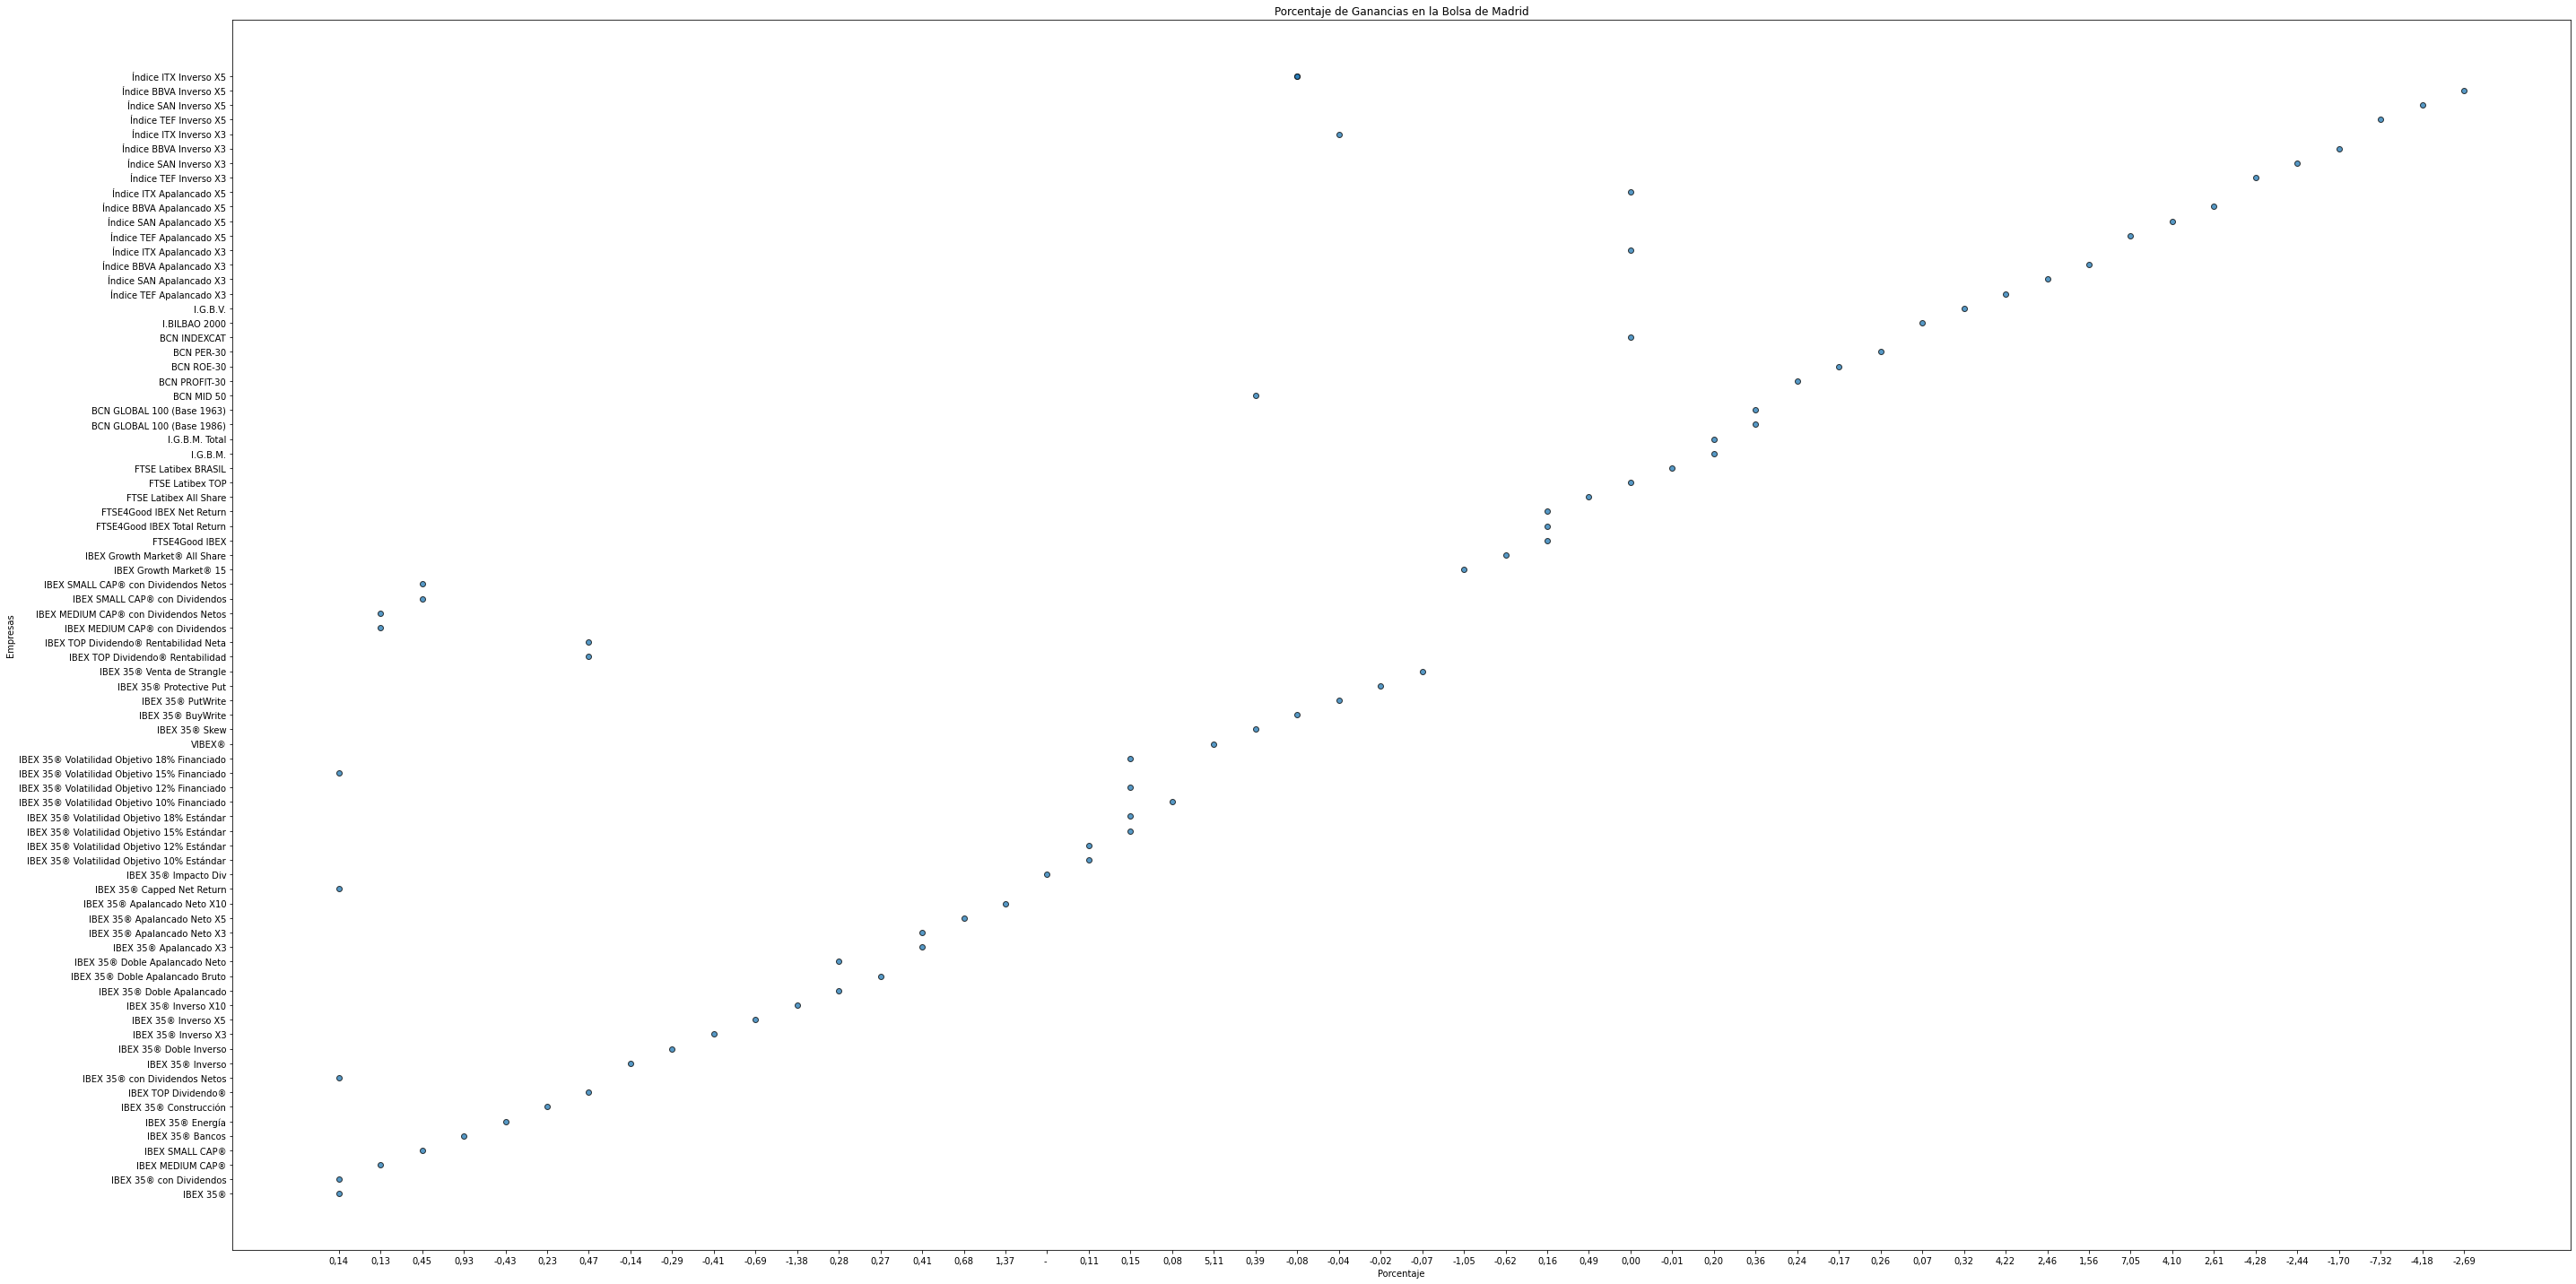

0      0,14
1      0,14
2      0,13
3      0,45
4      0,93
      ...  
74    -7,32
75    -4,18
76    -2,69
77    -0,08
78    -0,08
Name: Porcentaje, Length: 79, dtype: object


In [62]:


names = df["Name"]
porcentajes = df["Porcentaje"]

matplotlib.rcParams["figure.figsize"] =40 , 20
matplotlib.pyplot.scatter(porcentajes, names, edgecolors="black", linewidths=1,alpha=0.75)
matplotlib.pyplot.title("Porcentaje de Ganancias en la Bolsa de Madrid")
matplotlib.pyplot.xlabel("Porcentaje")
matplotlib.pyplot.ylabel("Empresas")

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()
print(porcentajes)

In [54]:
dfprom=df.sample(30)

,Name,Porcentaje
32,IBEX 35® Skew,"0,39"
72,Índice BBVA Inverso X3,"-1,70"
41,IBEX SMALL CAP® con Dividendos,"0,45"
73,Índice ITX Inverso X3,"-0,04"
8,IBEX 35® con Dividendos Netos,"0,14"
38,IBEX TOP Dividendo® Rentabilidad Neta,"0,47"
21,IBEX 35® Capped Net Return,"0,14"
5,IBEX 35® Energía,"-0,43"
71,Índice SAN Inverso X3,"-2,44"
4,IBEX 35® Bancos,"0,93"
